# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

# Importing Dataset

In [2]:
dataset = pd.read_csv("/content/Company_Data.csv")

In [3]:
dataset.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [4]:
dataset.tail()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes
399,9.71,134,37,0,27,120,Good,49,16,Yes,Yes


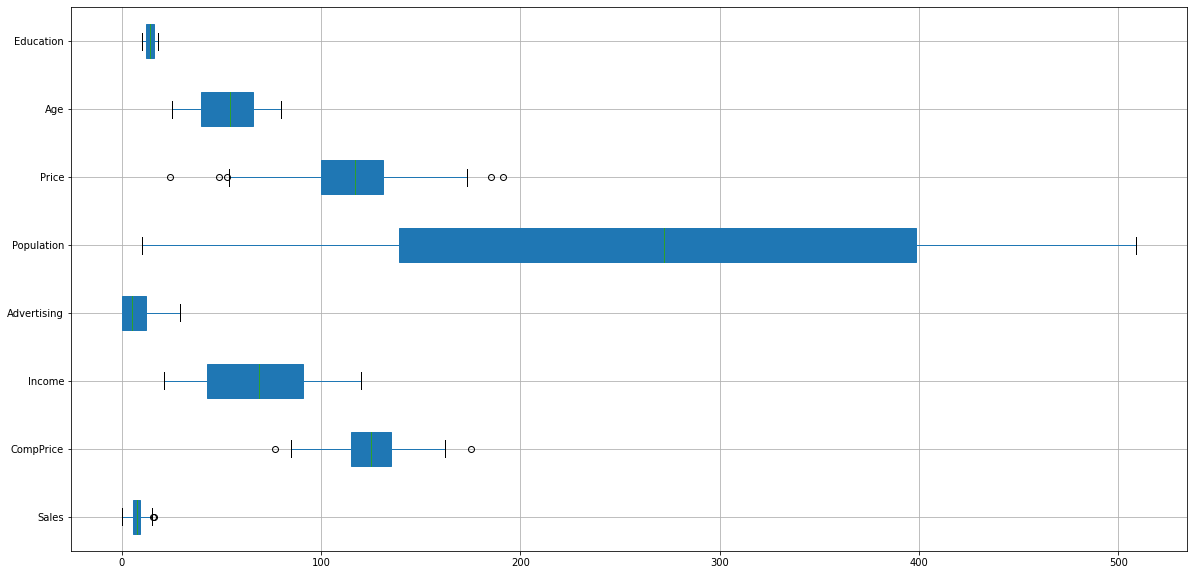

In [6]:
plt.figure(figsize=(20,10))
dataset.boxplot(patch_artist=True,vert=False)

In [7]:
dataset.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [9]:
dataset.shape

(400, 11)

In [10]:
list(dataset.columns)

['Sales',
 'CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Urban',
 'US']

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


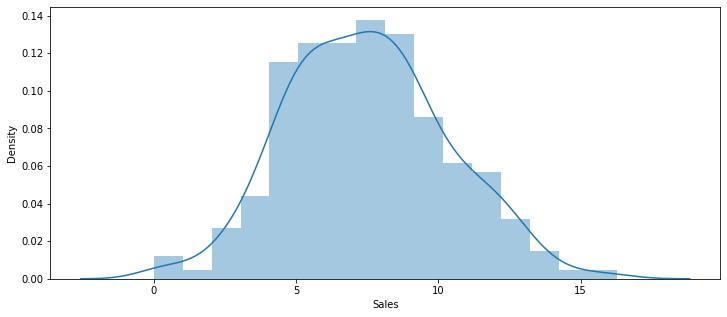

In [11]:
plt.figure(figsize=(12,5))
sns.distplot(dataset['Sales'])

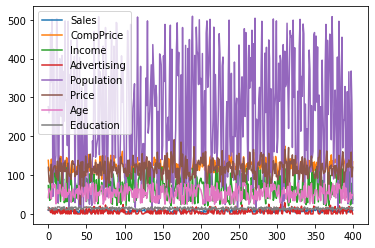

In [12]:
dataset.plot.line()

In [13]:
# categorical column
categorical_data = dataset.select_dtypes(include=[object])
categorical_data.head(2)

,ShelveLoc,Urban,US
0,Bad,Yes,Yes
1,Good,Yes,Yes


In [14]:
print(dataset['ShelveLoc'].unique())
print(dataset['Urban'].unique())
print(dataset['US'].unique())

['Bad' 'Good' 'Medium']
['Yes' 'No']
['Yes' 'No']


# Independent and Dependent Variables

# Splitting the Dataset

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset.drop(columns=['Sales']),dataset['Sales'],test_size = 0.25, random_state = 0)

In [19]:
X_train

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
250,137,105,10,435,156,Good,72,14,Yes,Yes
63,119,88,10,170,101,Medium,61,13,Yes,Yes
312,137,117,5,337,135,Bad,38,10,Yes,Yes
159,119,60,0,372,70,Bad,30,18,No,No
283,135,110,0,112,117,Medium,80,16,No,No
...,...,...,...,...,...,...,...,...,...,...
323,107,105,18,428,103,Medium,34,12,Yes,Yes
192,108,26,0,408,93,Medium,56,14,No,No
117,145,53,0,507,119,Medium,41,12,Yes,No
47,126,98,0,173,108,Bad,55,16,Yes,No


#Encoding Categorical Data

In [20]:
transformer=ColumnTransformer(transformers=[
    ('tnf1',OrdinalEncoder(categories=[["Bad","Medium","Good"]]),["ShelveLoc"]),
    ('tnf2',OneHotEncoder(sparse=False,drop='first'),['Urban','US'])
],remainder='passthrough')


In [21]:
X_train = transformer.fit_transform(X_train)
X_test=transformer.fit_transform(X_test)

# Feature Scaling

In [22]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

# MACHINE LEARNING ALGORITHM

DECISION TREE
Model1

In [23]:
#Fitting the model
from sklearn.tree import DecisionTreeRegressor
dtr= DecisionTreeRegressor()
dtr.fit(X_train,y_train)

DecisionTreeRegressor()

In [48]:
dtr.score(X_train,y_train)

1.0

In [24]:
dtr.score(X_test,y_test)

0.41392539992694677

Decission Tree Model 2 introducing criteria and depth

In [30]:
#Fitting the model2
from sklearn.tree import DecisionTreeRegressor
dtr1= DecisionTreeRegressor(criterion="mse",max_depth=5)
dtr1.fit(X_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(


DecisionTreeRegressor(criterion='mse', max_depth=5)

In [31]:
#Predict my test results
y_pred1 = dtr1.predict(X_test)

In [47]:
dtr1.score(X_train,y_train)

0.7519733714600138

In [39]:
dtr1.score(X_test,y_test)

0.26238631411698565

Model 2 shows extremely decrement in the r2score

#Validation
hyperparameter tuning
using gridserach cv

In [33]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth':[2,4,8,10,None],
    'criterion':['mse','mae'],
    'max_features':[0.25,0.5,1.0],
    'min_samples_split':[0.25,0.5,1.0]
}

In [34]:
reg = GridSearchCV(DecisionTreeRegressor(),param_grid=param_grid)

In [ ]:
reg.fit(X_train,y_train)

In [36]:
y_pred2=reg.predict(X_test)

In [38]:
reg.best_params_

{'criterion': 'mae',
 'max_depth': 4,
 'max_features': 0.5,
 'min_samples_split': 0.25}

In [ ]:
dtr2=DecisionTreeRegressor(criterion='mae',max_depth=4,max_features=0.5,min_samples_split=0.25)
dtr2.fit(X_train,y_train)

In [45]:
dtr2.score(X_train,y_train)

0.398111685164822

In [46]:
dtr2.score(X_test,y_test)

0.2866671889322787

In [50]:
from prettytable import PrettyTable
scoreTable =PrettyTable(['Model','train_score','test_score'])
scoreTable.add_row(['MOdel1','1.0','0.4139'])
scoreTable.add_row(['MOdel2','0.7519','0.2623'])
scoreTable.add_row(['validation','0.3981','0.2866'])
print(scoreTable)


+------------+-------------+------------+
|   Model    | train_score | test_score |
+------------+-------------+------------+
|   MOdel1   |     1.0     |   0.4139   |
|   MOdel2   |    0.7519   |   0.2623   |
| validation |    0.3981   |   0.2866   |
+------------+-------------+------------+


from the result it is clear that model1 performing better but its accuracy is not reliable on the other hand tuned result are more reliable and stable. so, we will go with tuned result prediction.  